In [21]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
from tqdm.auto import tqdm
import concurrent.futures
from multiprocessing import Pool
import copy,os,sys
from collections import Counter,deque
import  matplotlib.pyplot as plt
import pickle
import functools
import math

In [22]:
import numpy as np
import pandas as pd

# 绘制函数图像

## 函数

In [23]:
def time_decay(beta, dt):
    # beta=0 时系数都为1
    # beta越大衰减越快
    # beta=0.33   在300时衰减到接近消失(0.05)
    # beta=1.3   在150时衰减到接近消失(0.05)
    # beta=2.9   在100时衰减到接近消失(0.05)
    # beta=11  在50时衰减到接近消失(0.05)
    # beta=33  在30时衰减到接近消失(0.05)
    # beta=152 在14时衰减到接近消失(0.05)
    # beta=300 在10时衰减到接近消失(0.05)
    # beta=611 在7时衰减到接近消失(0.05)
    assert(beta>=0)
    return math.exp(-dt ** 2 * beta / (100 ** 2))

def _parse_beta(dt):
    # 想在第dt天衰减为0.05，需要什么样的beta
    return math.log(0.05)*100**2 / (-dt**2)

def _parse_dt(beta):
    # 使用beta后会在第几天衰减为0.05
    if beta==0:
        return 0
    else:
        return math.pow(-math.log(0.05)*100**2 / beta,0.5)

_parse_beta(dt=100)
_parse_dt(beta=10)

# x1 = np.arange(0,200,0.5)
# y1 = np.array([time_decay(2.99,i) for i in x1])
# _ = plt.plot(x1, y1)
# plt.show()


2.995732273553991

54.733283051119734

In [24]:
time_decay(beta=2.99,dt=0)
time_decay(beta=2.99,dt=7)
time_decay(beta=2.99,dt=14)
time_decay(beta=2.99,dt=30)
time_decay(beta=2.99,dt=48)

1.0

0.9854558036707737

0.9430801549631962

0.764066845143223

0.5021301148232891

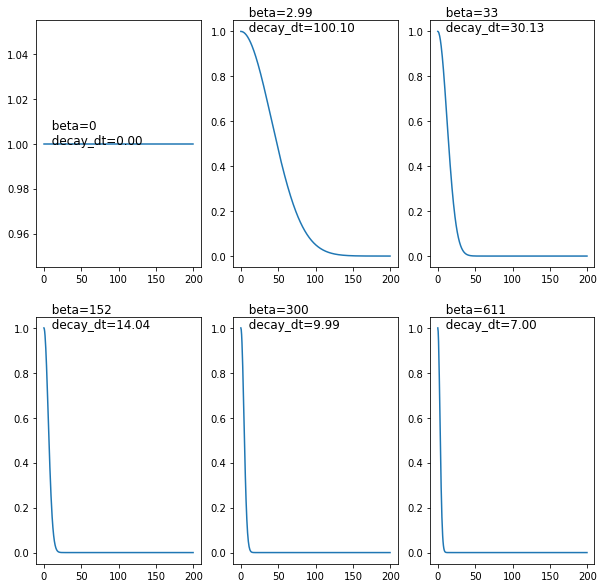

In [26]:
beta_list=[0,2.99,33,152,300,611]
x1 = np.arange(0,200,0.5)
fig,axe_list = plt.subplots(2,3, figsize=(10,10))
for idx,beta in enumerate(beta_list):
    axe = axe_list.flatten()[idx]
    y1 = np.array([time_decay(beta,i) for i in x1])
    decay_day=_parse_dt(beta)
    _ = axe.text(x=0, y=axe.get_ylim()[0]+1, s="  beta=%s\n  decay_dt=%.2f"% (beta,decay_day),size=12)
    _ = axe.plot(x1,y1)
plt.show()